In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Train shape: {0}".format(train.shape))
print("Test shape: {0}".format(test.shape))

Train shape: (891, 12)
Test shape: (418, 11)


In [3]:
train['Sex'] = (train['Sex'] == 'male').astype(int)
train = train.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
test['Sex'] = (test['Sex'] == 'male').astype(int)
test = test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

In [4]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

<IPython.core.display.Javascript object>


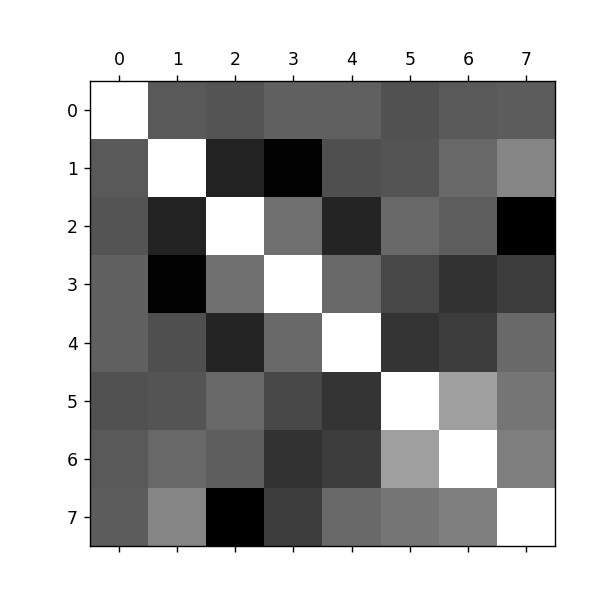

In [5]:
plt.matshow(train.corr(), cmap='gray')
plt.show()

In [6]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [7]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [8]:
X_train = train.iloc[:751, 2:].values
y_train = train.iloc[:751, 1].values
X_val = train.iloc[751:, 2:].values
y_val = train.iloc[751:, 1].values
X_test = test.iloc[:, 1:].values

In [9]:
print("Train shapes: {0}, {1}".format(X_train.shape, y_train.shape))
print("Val shapes: {0}, {1}".format(X_val.shape, y_val.shape))
print("Test shapes: {0}".format(X_test.shape))

Train shapes: (751, 6), (751,)
Val shapes: (140, 6), (140,)
Test shapes: (418, 6)


In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
__________________________________________________________

In [14]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
751/751 [==============================] - 1s 2ms/sample - loss: 2.2740 - accuracy: 0.4940
Epoch 2/1000
751/751 [==============================] - 0s 336us/sample - loss: 1.6357 - accuracy: 0.5766
Epoch 3/1000
751/751 [==============================] - 0s 343us/sample - loss: 1.4579 - accuracy: 0.5739
Epoch 4/1000
751/751 [==============================] - 0s 377us/sample - loss: 0.9537 - accuracy: 0.6338
Epoch 5/1000
751/751 [==============================] - 0s 357us/sample - loss: 1.0456 - accuracy: 0.6059
Epoch 6/1000
751/751 [==============================] - 0s 325us/sample - loss: 0.8023 - accuracy: 0.6591
Epoch 7/1000
751/751 [==============================] - 0s 335us/sample - loss: 0.9018 - accuracy: 0.6125
Epoch 8/1000
751/751 [==============================] - 0s 337us/sample - loss: 0.7314 - accuracy: 0.6312
Epoch 9/1000
751/751 [==============================] - 0s 339us/sample - loss: 0.7205 - accuracy: 0.6232
Epoch 10/1000
751/751 [=========================

751/751 [==============================] - 0s 348us/sample - loss: 0.6665 - accuracy: 0.6125
Epoch 78/1000
751/751 [==============================] - 0s 335us/sample - loss: 0.6634 - accuracy: 0.6112
Epoch 79/1000
751/751 [==============================] - 0s 344us/sample - loss: 0.6613 - accuracy: 0.6138
Epoch 80/1000
751/751 [==============================] - 0s 341us/sample - loss: 0.6612 - accuracy: 0.6138
Epoch 81/1000
751/751 [==============================] - 0s 321us/sample - loss: 0.6575 - accuracy: 0.6152
Epoch 82/1000
751/751 [==============================] - 0s 353us/sample - loss: 0.6647 - accuracy: 0.6152
Epoch 83/1000
751/751 [==============================] - 0s 342us/sample - loss: 0.6586 - accuracy: 0.6152
Epoch 84/1000
751/751 [==============================] - 0s 324us/sample - loss: 0.6638 - accuracy: 0.6152
Epoch 85/1000
751/751 [==============================] - 0s 340us/sample - loss: 0.6713 - accuracy: 0.6099
Epoch 86/1000
751/751 [============================

751/751 [==============================] - 0s 360us/sample - loss: 0.6622 - accuracy: 0.6099
Epoch 154/1000
751/751 [==============================] - 0s 396us/sample - loss: 0.6555 - accuracy: 0.6245
Epoch 155/1000
751/751 [==============================] - 0s 374us/sample - loss: 0.6666 - accuracy: 0.6192
Epoch 156/1000
751/751 [==============================] - 0s 369us/sample - loss: 0.6526 - accuracy: 0.6218
Epoch 157/1000
751/751 [==============================] - 0s 374us/sample - loss: 0.6592 - accuracy: 0.6192
Epoch 158/1000
751/751 [==============================] - 0s 395us/sample - loss: 0.6518 - accuracy: 0.6138
Epoch 159/1000
751/751 [==============================] - 0s 353us/sample - loss: 0.6568 - accuracy: 0.6218
Epoch 160/1000
751/751 [==============================] - 0s 326us/sample - loss: 0.6510 - accuracy: 0.6192
Epoch 161/1000
751/751 [==============================] - 0s 344us/sample - loss: 0.6597 - accuracy: 0.6205
Epoch 162/1000
751/751 [===================

Epoch 228/1000
751/751 [==============================] - 0s 360us/sample - loss: 0.5671 - accuracy: 0.6937
Epoch 229/1000
751/751 [==============================] - 0s 321us/sample - loss: 0.5786 - accuracy: 0.6871
Epoch 230/1000
751/751 [==============================] - 0s 351us/sample - loss: 0.5720 - accuracy: 0.6871
Epoch 231/1000
751/751 [==============================] - 0s 347us/sample - loss: 0.5670 - accuracy: 0.6951
Epoch 232/1000
751/751 [==============================] - 0s 349us/sample - loss: 0.5758 - accuracy: 0.6818
Epoch 233/1000
751/751 [==============================] - 0s 337us/sample - loss: 0.5764 - accuracy: 0.7004
Epoch 234/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.5729 - accuracy: 0.7004
Epoch 235/1000
751/751 [==============================] - 0s 331us/sample - loss: 0.5780 - accuracy: 0.6884
Epoch 236/1000
751/751 [==============================] - 0s 333us/sample - loss: 0.5658 - accuracy: 0.6924
Epoch 237/1000
751/751 [====

751/751 [==============================] - 0s 331us/sample - loss: 0.4851 - accuracy: 0.7803
Epoch 304/1000
751/751 [==============================] - 0s 320us/sample - loss: 0.5099 - accuracy: 0.7710
Epoch 305/1000
751/751 [==============================] - 0s 343us/sample - loss: 0.4932 - accuracy: 0.7723
Epoch 306/1000
751/751 [==============================] - 0s 324us/sample - loss: 0.4983 - accuracy: 0.7710
Epoch 307/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4846 - accuracy: 0.7963
Epoch 308/1000
751/751 [==============================] - 0s 335us/sample - loss: 0.4875 - accuracy: 0.7830
Epoch 309/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4826 - accuracy: 0.8003
Epoch 310/1000
751/751 [==============================] - 0s 340us/sample - loss: 0.4712 - accuracy: 0.7976
Epoch 311/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4867 - accuracy: 0.7909
Epoch 312/1000
751/751 [===================

751/751 [==============================] - 0s 309us/sample - loss: 0.4631 - accuracy: 0.7909
Epoch 379/1000
751/751 [==============================] - 0s 320us/sample - loss: 0.4607 - accuracy: 0.8069
Epoch 380/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4611 - accuracy: 0.7949
Epoch 381/1000
751/751 [==============================] - 0s 316us/sample - loss: 0.4574 - accuracy: 0.8016
Epoch 382/1000
751/751 [==============================] - 0s 327us/sample - loss: 0.4646 - accuracy: 0.8016
Epoch 383/1000
751/751 [==============================] - 0s 325us/sample - loss: 0.4758 - accuracy: 0.7896
Epoch 384/1000
751/751 [==============================] - 0s 359us/sample - loss: 0.4621 - accuracy: 0.7883
Epoch 385/1000
751/751 [==============================] - 0s 325us/sample - loss: 0.4631 - accuracy: 0.7883
Epoch 386/1000
751/751 [==============================] - 0s 320us/sample - loss: 0.4737 - accuracy: 0.7909
Epoch 387/1000
751/751 [===================

751/751 [==============================] - 0s 324us/sample - loss: 0.4413 - accuracy: 0.8136
Epoch 454/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4557 - accuracy: 0.8083
Epoch 455/1000
751/751 [==============================] - 0s 321us/sample - loss: 0.4454 - accuracy: 0.8056
Epoch 456/1000
751/751 [==============================] - 0s 333us/sample - loss: 0.4442 - accuracy: 0.7989
Epoch 457/1000
751/751 [==============================] - 0s 316us/sample - loss: 0.4380 - accuracy: 0.8123
Epoch 458/1000
751/751 [==============================] - 0s 348us/sample - loss: 0.4376 - accuracy: 0.8043
Epoch 459/1000
751/751 [==============================] - 0s 324us/sample - loss: 0.4459 - accuracy: 0.8003
Epoch 460/1000
751/751 [==============================] - 0s 333us/sample - loss: 0.4546 - accuracy: 0.8069
Epoch 461/1000
751/751 [==============================] - 0s 313us/sample - loss: 0.4439 - accuracy: 0.8083
Epoch 462/1000
751/751 [===================

Epoch 529/1000
751/751 [==============================] - 0s 331us/sample - loss: 0.4343 - accuracy: 0.8136
Epoch 530/1000
751/751 [==============================] - 0s 333us/sample - loss: 0.4388 - accuracy: 0.8069
Epoch 531/1000
751/751 [==============================] - 0s 316us/sample - loss: 0.4352 - accuracy: 0.8043
Epoch 532/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4311 - accuracy: 0.8096
Epoch 533/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4475 - accuracy: 0.7989
Epoch 534/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4426 - accuracy: 0.8149
Epoch 535/1000
751/751 [==============================] - 0s 336us/sample - loss: 0.4258 - accuracy: 0.8202
Epoch 536/1000
751/751 [==============================] - 0s 327us/sample - loss: 0.4326 - accuracy: 0.8056
Epoch 537/1000
751/751 [==============================] - 0s 317us/sample - loss: 0.4339 - accuracy: 0.8202
Epoch 538/1000
751/751 [====

751/751 [==============================] - 0s 311us/sample - loss: 0.4202 - accuracy: 0.8189
Epoch 605/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4319 - accuracy: 0.8149
Epoch 606/1000
751/751 [==============================] - 0s 319us/sample - loss: 0.4308 - accuracy: 0.8123 - loss: 0.4273 - accuracy: 
Epoch 607/1000
751/751 [==============================] - 0s 320us/sample - loss: 0.4399 - accuracy: 0.8109
Epoch 608/1000
751/751 [==============================] - 0s 336us/sample - loss: 0.4355 - accuracy: 0.8056
Epoch 609/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4255 - accuracy: 0.8189
Epoch 610/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4098 - accuracy: 0.8349
Epoch 611/1000
751/751 [==============================] - 0s 327us/sample - loss: 0.4346 - accuracy: 0.8109
Epoch 612/1000
751/751 [==============================] - 0s 327us/sample - loss: 0.4296 - accuracy: 0.8202
Epoch 613/1000


751/751 [==============================] - 0s 320us/sample - loss: 0.4252 - accuracy: 0.8109
Epoch 680/1000
751/751 [==============================] - 0s 335us/sample - loss: 0.4257 - accuracy: 0.8162
Epoch 681/1000
751/751 [==============================] - 0s 319us/sample - loss: 0.4143 - accuracy: 0.8242
Epoch 682/1000
751/751 [==============================] - 0s 323us/sample - loss: 0.4123 - accuracy: 0.8216
Epoch 683/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4253 - accuracy: 0.8176
Epoch 684/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4312 - accuracy: 0.8162
Epoch 685/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4272 - accuracy: 0.8069
Epoch 686/1000
751/751 [==============================] - 0s 340us/sample - loss: 0.4305 - accuracy: 0.8189
Epoch 687/1000
751/751 [==============================] - 0s 343us/sample - loss: 0.4128 - accuracy: 0.8189
Epoch 688/1000
751/751 [===================

Epoch 755/1000
751/751 [==============================] - 0s 323us/sample - loss: 0.4227 - accuracy: 0.8269
Epoch 756/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4101 - accuracy: 0.8229
Epoch 757/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4240 - accuracy: 0.8056
Epoch 758/1000
751/751 [==============================] - 0s 331us/sample - loss: 0.4298 - accuracy: 0.8069
Epoch 759/1000
751/751 [==============================] - 0s 343us/sample - loss: 0.4123 - accuracy: 0.8296
Epoch 760/1000
751/751 [==============================] - 0s 337us/sample - loss: 0.4110 - accuracy: 0.8162
Epoch 761/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4264 - accuracy: 0.8216
Epoch 762/1000
751/751 [==============================] - 0s 333us/sample - loss: 0.4228 - accuracy: 0.8202
Epoch 763/1000
751/751 [==============================] - 0s 353us/sample - loss: 0.4195 - accuracy: 0.8123
Epoch 764/1000
751/751 [====

751/751 [==============================] - 0s 330us/sample - loss: 0.4211 - accuracy: 0.8202
Epoch 831/1000
751/751 [==============================] - 0s 339us/sample - loss: 0.4188 - accuracy: 0.8242
Epoch 832/1000
751/751 [==============================] - 0s 336us/sample - loss: 0.4105 - accuracy: 0.8149
Epoch 833/1000
751/751 [==============================] - 0s 344us/sample - loss: 0.4100 - accuracy: 0.8202
Epoch 834/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4161 - accuracy: 0.8256
Epoch 835/1000
751/751 [==============================] - 0s 332us/sample - loss: 0.4229 - accuracy: 0.8136
Epoch 836/1000
751/751 [==============================] - 0s 330us/sample - loss: 0.4081 - accuracy: 0.8176
Epoch 837/1000
751/751 [==============================] - 0s 344us/sample - loss: 0.4146 - accuracy: 0.8216
Epoch 838/1000
751/751 [==============================] - 0s 322us/sample - loss: 0.4201 - accuracy: 0.8176
Epoch 839/1000
751/751 [===================

751/751 [==============================] - 0s 341us/sample - loss: 0.4131 - accuracy: 0.8162
Epoch 906/1000
751/751 [==============================] - 0s 357us/sample - loss: 0.4179 - accuracy: 0.8176
Epoch 907/1000
751/751 [==============================] - 0s 347us/sample - loss: 0.4231 - accuracy: 0.8282
Epoch 908/1000
751/751 [==============================] - 0s 336us/sample - loss: 0.4173 - accuracy: 0.8229
Epoch 909/1000
751/751 [==============================] - 0s 370us/sample - loss: 0.4114 - accuracy: 0.8136
Epoch 910/1000
751/751 [==============================] - 0s 357us/sample - loss: 0.4252 - accuracy: 0.8242
Epoch 911/1000
751/751 [==============================] - 0s 325us/sample - loss: 0.4165 - accuracy: 0.8149
Epoch 912/1000
751/751 [==============================] - 0s 355us/sample - loss: 0.4146 - accuracy: 0.8176
Epoch 913/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4092 - accuracy: 0.8189
Epoch 914/1000
751/751 [===================

751/751 [==============================] - 0s 353us/sample - loss: 0.4221 - accuracy: 0.8149
Epoch 981/1000
751/751 [==============================] - 0s 339us/sample - loss: 0.4019 - accuracy: 0.8309
Epoch 982/1000
751/751 [==============================] - 0s 331us/sample - loss: 0.4063 - accuracy: 0.8256
Epoch 983/1000
751/751 [==============================] - 0s 343us/sample - loss: 0.4125 - accuracy: 0.8269
Epoch 984/1000
751/751 [==============================] - 0s 336us/sample - loss: 0.4215 - accuracy: 0.8189
Epoch 985/1000
751/751 [==============================] - 0s 345us/sample - loss: 0.4031 - accuracy: 0.8229
Epoch 986/1000
751/751 [==============================] - 0s 337us/sample - loss: 0.4050 - accuracy: 0.8269
Epoch 987/1000
751/751 [==============================] - 0s 328us/sample - loss: 0.4122 - accuracy: 0.8149
Epoch 988/1000
751/751 [==============================] - 0s 329us/sample - loss: 0.4006 - accuracy: 0.8309
Epoch 989/1000
751/751 [===================

In [15]:
model.evaluate(X_val, y_val)

140/140 [==============================] - 0s 1ms/sample - loss: 0.3159 - accuracy: 0.8714


[0.315940351997103, 0.87142855]